In [200]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# commented are not in the list :/
conditions=[
    'kimos-maui-lahaina',
    'sunnyside-tahoe-city-2',
    'dukes-huntington-beach-huntington-beach-2',
    # 'dukes-la-jolla-la-jolla',
    # 'dukes-malibu-malibu-2',
    'dukes-beach-house-lahaina',
    # 'dukes-kauai-lihue-3',
    # 'dukes-waikiki-honolulu-2',
    # 'hula-grill-waikiki-honolulu-3',
    'hula-grill-kaanapali-lahaina-2',
    # 'keokis-paradise-koloa',
    'leilanis-lahaina-2'
]

## Ratings Data

In [208]:
file_path1 =  "../../data/processed/hi_rws_0001_0256_complete.csv"
dataset1 = pd.read_csv(file_path1) 
dataset1.alias.unique()

array(['kimos-maui-lahaina', 'lahaina-fish-lahaina', 'blu-maui-lahaina',
       ..., 'kualapuu-cookhouse-kualapuu', 'okina-adventures-kula-3',
       'hoapili-trail-wailea'], dtype=object)

In [283]:
df = dataset1.loc[dataset1.alias == 'leilanis-lahaina-2']

In [285]:
df.loc[:, ['dataPublished']] = df.dataPublished.apply( lambda x: pd.to_datetime(x))
df.loc[:, 'rating_high'] = df.ratingValue >= 4
df.loc[:, 'rating_low'] = df.ratingValue <= 2

In [286]:
df.dataPublished.iloc[0]

Timestamp('2019-01-15 00:00:00')

In [287]:
df = df[df.dataPublished > datetime.datetime(2018, 6, 1)]
df.head(2)

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens,sent_topics,topic_mode,topic_list,svm_classifier,rating_high,rating_low
52944,leilanis-lahaina-2,5,2019-01-15,"Amazing! First of all, they were VERY accommod...",Sara H.,1,64,6,309,4.000000,...,"[('Amazing', '!'), ('First', 'of', 'all', ',',...","[('amaz',), ('first', 'accommod', 'dairi', 'ce...","['Amazing', '!', 'First', 'of', 'all', ',', 't...","['amaz', 'first', 'accommod', 'dairi', 'celiac...","[(5, 0.17131929099559784), (6, 0.1524756103754...",5,"5,6,5,5,5,5",1,True,False
52945,leilanis-lahaina-2,5,2019-01-14,So good! Worth the splurge! Butte stout was de...,Jennifer K.,1,94,11,414,3.542553,...,"[('So', 'good', '!'), ('Worth', 'the', 'splurg...","[('good',), ('worth', 'splurg'), ('butt', 'sto...","['So', 'good', '!', 'Worth', 'the', 'splurge',...","['good', 'worth', 'splurg', 'butt', 'stout', '...","[(5, 0.17131929099559784), (5, 0.1962578296661...",5,"5,5,5,5,5,5,5,1,5,5,5",1,True,False


### Time Based Rating Positive / Negative Reviews

In [399]:
df_g = df\
    .groupby(pd.Grouper(key="dataPublished", freq="W"))\
    .sum()\
    .loc[:, ['rating_high', 'rating_low']]

In [400]:
def normalize(x, series):
    min_value = min(series)
    max_value = max(series)
    
    return (x - min_value) / max_value

df_g['rating_high_n'] = df_g.rating_high.apply(lambda x: normalize(x, df_g.rating_high))
df_g['rating_low_n'] = df_g.rating_low.apply(lambda x: normalize(x, df_g.rating_low))

In [401]:
df_g['%_nn'] = df_g.rating_low / (df_g.rating_high + df_g.rating_low) * 100 * (df_g.rating_low_n)
df_g['%_n'] = df_g.rating_low / (df_g.rating_high + df_g.rating_low) * 100
df_g['%_pn'] = df_g.rating_high / (df_g.rating_high + df_g.rating_low) * 100 * (df_g.rating_high_n)
df_g['%_p'] = df_g.rating_high / (df_g.rating_high + df_g.rating_low) * 100

In [407]:
df_g.sample(3)

,rating_high,rating_low,rating_high_n,rating_low_n,%_nn,%_n,%_pn,%_p
dataPublished,,,,,,,,
2018-12-09,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,100.0
2018-09-02,3.0,2.0,0.153846,0.5,20.0,40.0,9.230769,60.0
2018-10-14,3.0,2.0,0.153846,0.5,20.0,40.0,9.230769,60.0


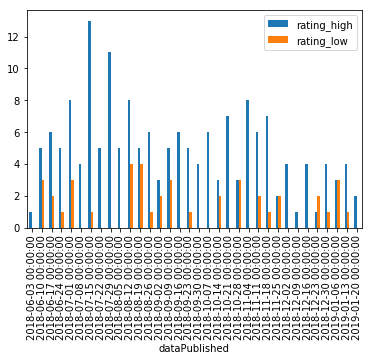

In [408]:
df_g.loc[:, ['rating_high', 'rating_low']].plot.bar()

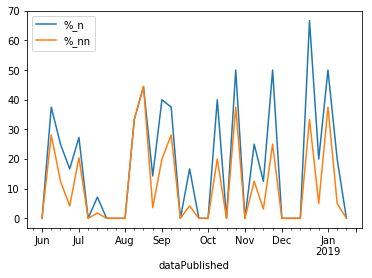

In [409]:
df_g.loc[:, ['%_n', '%_nn']].plot()

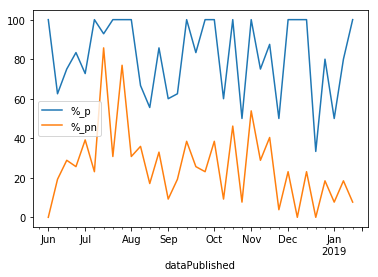

In [410]:
df_g.loc[:, ['%_p', '%_pn']].plot()

## Topics Data

In [411]:
df.head(2)

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens,sent_topics,topic_mode,topic_list,svm_classifier,rating_high,rating_low
52944,leilanis-lahaina-2,5,2019-01-15,"Amazing! First of all, they were VERY accommod...",Sara H.,1,64,6,309,4.000000,...,"[('Amazing', '!'), ('First', 'of', 'all', ',',...","[('amaz',), ('first', 'accommod', 'dairi', 'ce...","['Amazing', '!', 'First', 'of', 'all', ',', 't...","['amaz', 'first', 'accommod', 'dairi', 'celiac...","[(5, 0.17131929099559784), (6, 0.1524756103754...",5,"5,6,5,5,5,5",1,True,False
52945,leilanis-lahaina-2,5,2019-01-14,So good! Worth the splurge! Butte stout was de...,Jennifer K.,1,94,11,414,3.542553,...,"[('So', 'good', '!'), ('Worth', 'the', 'splurg...","[('good',), ('worth', 'splurg'), ('butt', 'sto...","['So', 'good', '!', 'Worth', 'the', 'splurge',...","['good', 'worth', 'splurg', 'butt', 'stout', '...","[(5, 0.17131929099559784), (5, 0.1962578296661...",5,"5,5,5,5,5,5,5,1,5,5,5",1,True,False


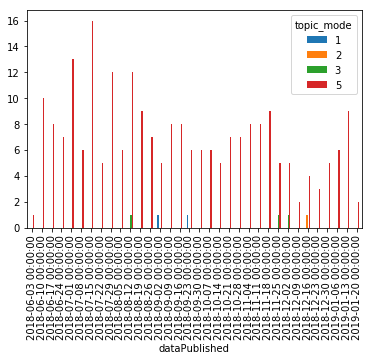

In [414]:
df.pivot_table(index='dataPublished', columns='topic_mode', aggfunc='size')\
    .reset_index()\
    .groupby(pd.Grouper(key="dataPublished", freq="W"))\
    .sum()\
    .plot\
    .bar()

### Some Reviews

In [413]:
df.loc[(df.topic_mode == 5) & df.svm_classifier, ['description', 'ratingValue', 'svm_classifier']].sample(3)

,description,ratingValue,svm_classifier
53169,We've eaten at Leilani's several times during ...,2,1
53086,Came here for our last dinner on Maui and we'r...,5,1
53039,Hawaiian chain type restaurant with pretty dec...,4,1
